In [ ]:
import monai

from typing import List, Union, Callable, Dict, Optional, Sequence

import numpy as np
import torch
from torch.utils.data import IterableDataset

from monai.transforms.post.array import ProbNMS
from monai.utils import optional_import
from monai.data.dataset import Dataset
from monai.data.utils import iter_patch
from monai.transforms import apply_transform
from monai.utils import NumpyPadMode, ensure_tuple
from monai.data import DataLoader

import time
import matplotlib.pyplot as plt

from PIL import Image

import random

In [ ]:
dir = 'C:/Users/dorim/Desktop/python_study/'

In [ ]:
img = dir + 'image/LN_001.png'

label = dir + 'filled_label/img_01_mask.png'

type(img)

str

In [ ]:
test_loader = monai.transforms.LoadImage(monai.data.PILReader(converter=lambda image: image.convert("1")))

In [ ]:
loader = monai.transforms.LoadImage(monai.data.PILReader())

## 한장 처리

In [ ]:
test_data, test_meta = test_loader(img)

test_data = test_data.reshape(1, test_data.shape[0], test_data.shape[1])

Image size (117280283 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.


(16619, 7057, 3)

In [ ]:
test_data2, meta2 = test_loader(label)

test_data2 = test_data2.reshape(1, test_data2.shape[0], test_data2.shape[1])

Image size (117280283 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.


In [ ]:
height = test_data.shape[1]
width = test_data2.shape[2]

height, width

(16619, 7057)

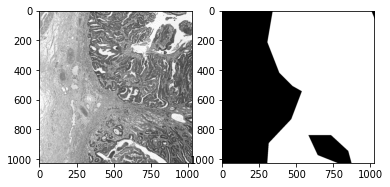

In [ ]:

plt.subplot(1,2,1)
plt.imshow(test_data[0, 5392:6417, 1856:2881], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(test_data2[0, 5392:6417, 1856:2881], cmap = 'gray')

plt.show()

In [ ]:
for i in range(10):
    for j in range(30):
        plt.subplot(1,2,1)
        patchs = test_data[0,((height//30)*j):((height//30)*(j+1)),((width//10)*i):((width//10)*(i+1))].astype(int)
        plt.imshow(patchs, cmap = 'gray')
        plt.imsave(f'C:/Users/dorim/Desktop/python_study/patchs/Image{j+1:02d}{i+1:02d}.png', patchs, cmap = 'gray')
        # im = Image.fromarray(patchs)
        # im.save(f'C:/Users/dorim/Desktop/python_study/patchs/Image{j+1:02d}{i+1:02d}.png')

        plt.subplot(1,2,2)
        plt.imshow(test_data2[0,((height//30)*j):((height//30)*(j+1)),((width//10)*i):((width//10)*(i+1))], cmap = 'gray')

        plt.show()

## 다중 처리

LN Image

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


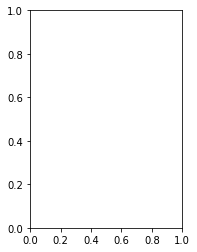

In [ ]:
for k in range(9):

    file = f"img{k+2}" 
    file = dir + (f'image/LN_0{k+2:02d}.png')

    test_data, test_meta = test_loader(file)

    test_data = test_data.reshape(1, test_data.shape[0], test_data.shape[1])

    height = test_data.shape[1]
    width = test_data.shape[2]

    for i in range(10):
        for j in range(30):    
            plt.subplot(1,2,1)
            patchs = test_data[0,((height//30)*j):((height//30)*(j+1)),((width//10)*i):((width//10)*(i+1))].astype(int)
            plt.imsave(f'C:/Users/dorim/Desktop/python_study/patchs/img{k+2:02d}/Image{j+1:02d}{i+1:02d}.png', patchs, cmap = 'gray')

NOLN Iamge

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


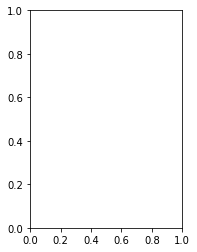

In [ ]:
for k in range(10):
    
    file = f"img{k+1}" 
    file = dir + (f'image/NOLN_0{k+1:02d}.png')

    test_data, test_meta = test_loader(file)

    test_data = test_data.reshape(1, test_data.shape[0], test_data.shape[1])

    height = test_data.shape[1]
    width = test_data.shape[2]

    for i in range(10):
        for j in range(30):    
            patchs = test_data[0,((height//30)*j):((height//30)*(j+1)),((width//10)*i):((width//10)*(i+1))].astype(int)
            plt.imsave(f'C:/Users/dorim/Desktop/python_study/patchs/img{k+11:02d}/Image{j+1:02d}{i+1:02d}.png', patchs, cmap = 'gray')

label

In [ ]:
for k in range(20):
    
    file = f"img{k+1}" 
    file = dir + (f'filled_label/img_{k+1:02d}_mask.png')

    data, meta = loader(file)

    h, w, c_c = data.shape

    for i in range(10):
        for j in range(30):    
            patchs = data[((h//30)*j):((h//30)*(j+1)),((w//10)*i):((w//10)*(i+1)), :] / 255
            plt.imsave(f'C:/Users/dorim/Desktop/python_study/patchs/label/label{k+1:02d}/mask{j+1:02d}{i+1:02d}.png', patchs)

## channel 유지

In [ ]:
data, meta = loader(img)

type(data)

Image size (117280283 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.


numpy.ndarray

In [ ]:
h, w, c_c = data.shape

h, w, c_c

(16619, 7057, 3)

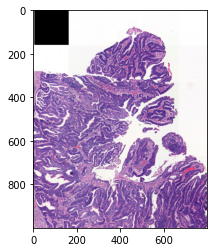

In [ ]:
img_rgb = data[4900:5900, 2200:3000, :] / 255

plt.imshow(img_rgb)

In [ ]:
for i in range(10):
    for j in range(30):
        patchs = data[((h//30)*j):((h//30)*(j+1)),((w//10)*i):((w//10)*(i+1)), :] / 255
        plt.imsave(f'C:/Users/dorim/Desktop/test/Image{j+1:02d}{i+1:02d}.png', patchs)
        # im = Image.fromarray(patchs)
        # im.save(f'C:/Users/dorim/Desktop/test/Image{j+1:02d}{i+1:02d}.png')



Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


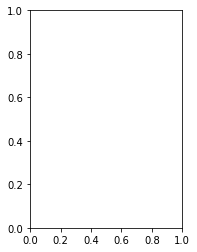

In [ ]:
for k in range(10):
    
    file = f"img{k+1}" 
    file = dir + (f'image/LN_0{k+1:02d}.png')

    data, meta = loader(file)

    h, w, c_c = data.shape

    for i in range(10):
        for j in range(30):    
            plt.subplot(1,2,1)
            patchs = data[((h//30)*j):((h//30)*(j+1)),((w//10)*i):((w//10)*(i+1)), :] / 255
            plt.imsave(f'C:/Users/dorim/Desktop/python_study/patchs/Img/img{k+1:02d}/Image{k+1:02d}{j+1:02d}{i+1:02d}.png', patchs)

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


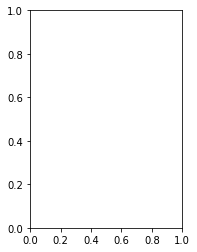

In [ ]:
for k in range(10):
    
    file = f"no_img{k+1}" 
    file = dir + (f'image/NOLN_0{k+1:02d}.png')

    data, meta = loader(file)

    h, w, c_c = data.shape

    for i in range(10):
        for j in range(30):    
            plt.subplot(1,2,1)
            patchs = data[((h//30)*j):((h//30)*(j+1)),((w//10)*i):((w//10)*(i+1)), :] / 255
            plt.imsave(f'C:/Users/dorim/Desktop/python_study/patchs/Img/img{k+11:02d}/Image{k+11:02d}{j+1:02d}{i+1:02d}.png', patchs)

## 마스크

In [ ]:
mask = 'C:/Users/dorim/Desktop/python_study/filled_label/img_01_mask.png'

In [ ]:
mak, mak_meta = loader(mask)

mak.shape

Image size (117280283 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.


(16619, 7057, 3)

In [ ]:
mak = torch.from_numpy(mak)

mak = mak.permute(2, 0, 1)

mak.shape

torch.Size([3, 16619, 7057])

## random position

In [ ]:
img_data, img_meta = loader(img)

img_data.shape

label_data, label_meta = loader(label)

label_data.shape

(16619, 7057, 3)

In [ ]:
height = img_data.shape[0]
width = img_data.shape[1]

In [ ]:
import random

h = []
a = random.sample(range(0, height), 1)
# h.append(a)

w = []
b = random.sample(range(0, width), 1)
# w.append(b)

img_rgb = img_data[a[0]:a[0]+300, b[0]:b[0]+300 , :] / 255
label_rgb = label_data[a[0]:a[0]+300, b[0]:b[0]+300 , :] / 255

if sum(sum(sum(img_rgb == 0))) >= 270000*0.2:
    pass

else:
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)

    plt.show()

    print(sum(sum(sum(img_rgb == 0))))

    plt.subplot(1,2,2)
    plt.imshow(label_rgb)
    plt.title("label")

    plt.show()

In [ ]:
label_rgb.shape

(1000, 1000, 3)

In [ ]:
label_rgb.size

3000000

In [ ]:
# print(sum(label_rgb >= 1),"\n")
# print(sum(sum(label_rgb >= 1)),"\n")
print(sum(sum(sum(label_rgb == 0))),"\n")

print(int(label_rgb.size * 0.4), "\n")

print(sum(sum(sum(label_rgb == 1))) >= int(label_rgb.size * 0.4))


2946000 

1178400 

False


In [ ]:
l = 100

count = 0

h = random.sample(range(0, height-1000), l)

w = random.sample(range(0, width-1000), l)

for i in range(l):
    img_rgb = img_data[h[i]:h[i]+1000, w[i]:w[i]+1000 , :] / 255
    label_rgb = label_data[h[i]:h[i]+1000, w[i]:w[i]+1000 , :] / 255

    if sum(sum(sum(img_rgb == 0))) >= 3000000*0.7:
        count += 1
    
    else:  
        plt.subplot(1,2,1)
        plt.imshow(img_rgb)

        plt.subplot(1,2,2)
        plt.imshow(label_rgb)

        if sum(sum(sum(label_rgb == 1))) >= int(label_rgb.size * 0.12):
            plt.title("cancer")

        else:
            plt.title("normal")


        plt.show()

print(count)

In [ ]:
l = 2000

for k in range(20):
    
    file = f"img{k+1}"

    if k < 10:
        file = dir + (f'image/LN_0{k+1:02d}.png')
        label_file = dir +(f'filled_label/img_{k+1:02d}_mask.png')
    else:
        file = dir + (f'image/NOLN_0{k-9:02d}.png')
        label_file = dir +(f'filled_label/img_{k+1:02d}_mask.png')

    image_data, image_meta = loader(file)
    label_data, label_meta = loader(label_file)

    height = image_data.shape[0]
    width = image_data.shape[1]

    h = random.sample(range(0, height-300), l)

    w = random.sample(range(0, width-300), l)

    for i in range(l):
        img_rgb = image_data[h[i]:h[i]+300, w[i]:w[i]+300 , :] / 255
        label_rgb = label_data[h[i]:h[i]+300, w[i]:w[i]+300 , :] / 255

        if sum(sum(sum(img_rgb == 0))) >= 270000*0.2:
            pass
        
        else:  
            if sum(sum(sum(label_rgb == 1))) >= int(label_rgb.size * 0.12):
                #abnormal
                plt.imsave(f'C:/Users/dorim/Desktop/python_study/new_patch/cancer/img{k+1:02d}/Image{k+1:02d}{i+1:003d}_abnormal.png', img_rgb)

            else:
                #normal
                plt.imsave(f'C:/Users/dorim/Desktop/python_study/new_patch/normal/img{k+1:02d}/Image{k+1:02d}{i+1:003d}_normal.png', img_rgb)

